# Assignment - Naive Bayes

1. Prepare a classification model using Naive Bayes for salary data 


Data Description:

age -- age of a person

workclass-- A work class is a grouping of work 

education-- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation-- occupation of an individuals

relationship -- 

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import dataset

In [2]:
df = pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [4]:
df.drop_duplicates(keep='first', inplace=True)

In [5]:
print('Shape of dataframe after dropping duplicates',df.shape)

Shape of dataframe after dropping duplicates (26903, 14)


In [6]:
#Dropping the Education clumn as it is mapped to education number
df.drop(['education'],axis=1,inplace=True)

In [7]:
df.shape

(26903, 13)

In [8]:
dt = pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/SalaryData_Test.csv')
dt.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
dt.duplicated().value_counts()

False    14130
True       930
dtype: int64

In [10]:
dt.drop_duplicates(keep='first', inplace=True)

In [11]:
print('Shape of dataframe after dropping duplicates',dt.shape)

Shape of dataframe after dropping duplicates (14130, 14)


In [12]:
#Dropping the Education clumn as it is mapped to education number
dt.drop(['education'],axis=1,inplace=True)


# Exploratory data analysis

In [13]:
df.shape

(26903, 13)

In [14]:
dt.shape

(14130, 13)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   educationno    26903 non-null  int64 
 3   maritalstatus  26903 non-null  object
 4   occupation     26903 non-null  object
 5   relationship   26903 non-null  object
 6   race           26903 non-null  object
 7   sex            26903 non-null  object
 8   capitalgain    26903 non-null  int64 
 9   capitalloss    26903 non-null  int64 
 10  hoursperweek   26903 non-null  int64 
 11  native         26903 non-null  object
 12  Salary         26903 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.9+ MB


In [16]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   educationno    14130 non-null  int64 
 3   maritalstatus  14130 non-null  object
 4   occupation     14130 non-null  object
 5   relationship   14130 non-null  object
 6   race           14130 non-null  object
 7   sex            14130 non-null  object
 8   capitalgain    14130 non-null  int64 
 9   capitalloss    14130 non-null  int64 
 10  hoursperweek   14130 non-null  int64 
 11  native         14130 non-null  object
 12  Salary         14130 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.5+ MB


In [18]:
dt.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [19]:
# Label Encoding Categorical Columns

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','maritalstatus','occupation','relationship','race','sex','native','Salary']  

encoder=preprocessing.LabelEncoder()
for col in cols:
    
    df[col]=encoder.fit_transform(df[col])
    dt[col]=encoder.fit_transform(dt[col])

In [20]:
# scaling the data 

#Scaling the data for normalizaton 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['age','workclass','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native']] = scaler.fit_transform(df[['age','workclass','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native']])


In [21]:
df.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,-0.003726,2.791383,1.089919,0.939836,-1.503368,-0.277736,0.406417,0.705589,0.122810,-0.23133,-0.094323,0.282414,0
1,0.830329,1.788156,1.089919,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-2.281121,0.282414,0
2,-0.079549,-0.218299,-0.436737,-1.676988,-0.261669,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414,0
3,1.057799,-0.218299,-1.200065,-0.368576,-0.261669,-0.895505,-1.889403,0.705589,-0.155722,-0.23133,-0.094323,0.282414,0
4,-0.837781,-0.218299,1.089919,-0.368576,0.731690,2.193341,-1.889403,-1.417255,-0.155722,-0.23133,-0.094323,-4.979105,0


In [22]:
dt.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0


# Splitting the Data 

In [23]:
X_train = df.drop(['Salary'], axis=1)

y_train = df['Salary']

X_test=dt.drop(['Salary'], axis=1)
y_test=dt['Salary']

In [24]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((26903, 12), (14130, 12), (26903,), (14130,))

# Encode categorical variables

In [25]:
X_train.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.003726,2.791383,1.089919,0.939836,-1.503368,-0.277736,0.406417,0.705589,0.122810,-0.23133,-0.094323,0.282414
1,0.830329,1.788156,1.089919,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-2.281121,0.282414
2,-0.079549,-0.218299,-0.436737,-1.676988,-0.261669,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
3,1.057799,-0.218299,-1.200065,-0.368576,-0.261669,-0.895505,-1.889403,0.705589,-0.155722,-0.23133,-0.094323,0.282414
4,-0.837781,-0.218299,1.089919,-0.368576,0.731690,2.193341,-1.889403,-1.417255,-0.155722,-0.23133,-0.094323,-4.979105


We can see that from the initial 14 columns, we now have 102 columns.

In [26]:
X_test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,7,4,6,3,2,1,0,0,40,37
1,38,2,9,2,4,0,4,1,0,0,50,37
2,28,1,12,2,10,0,4,1,0,0,40,37
3,44,2,10,2,6,0,2,1,7688,0,40,37
4,34,2,6,4,7,1,4,1,0,0,30,37


# Model training

In [29]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# Predict the results 

In [30]:
y_pred_test = gnb.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

# Check accuracy score

In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_pred_test, y_test)))

Model accuracy score: 0.7736


# Compare the train-set and test-set accuracy

In [33]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7936


# Confusion matrix 

In [35]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_pred_test, y_test)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[9796 2375]
 [ 824 1135]]

True Positives(TP) =  9796

True Negatives(TN) =  1135

False Positives(FP) =  2375

False Negatives(FN) =  824


<AxesSubplot:>

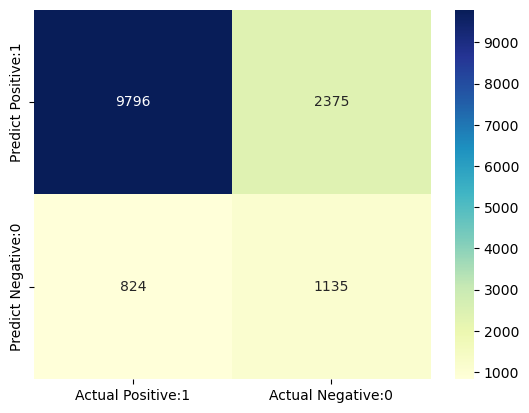

In [36]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices 

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     10620
           1       0.58      0.32      0.42      3510

    accuracy                           0.77     14130
   macro avg       0.69      0.62      0.64     14130
weighted avg       0.75      0.77      0.75     14130



# Calculate class probabilities 

In [47]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.00000000e+000, 1.08578701e-209],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 6.76244780e-226],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 8.22806062e-249],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.49688834e-204],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 4.71444021e-297]])

Observations

* In each row, the numbers sum to 1.

* There are 2 columns which correspond to 2 classes - <=50K and >50K.

        * Class 0 => <=50K - Class that a person makes less than equal to 50K.

        * Class 1 => >50K - Class that a person makes more than 50K.

* Importance of predicted probabilities

    * We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.

* predict_proba process

    * Predicts the probabilities

    * Choose the class with the highest probability

* Classification threshold level

    * There is a classification threshold level of 0.5.

    * Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

    * Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [48]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.0,1.085787e-209
1,1.0,0.000000e+00
2,1.0,6.762448e-226
3,0.0,1.000000e+00
4,1.0,8.228061e-249
5,0.0,1.000000e+00
6,1.0,3.496888e-204
7,1.0,0.000000e+00
8,0.0,1.000000e+00
9,1.0,4.714440e-297


In [51]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]
y_pred1

array([1.08578701e-209, 0.00000000e+000, 6.76244780e-226, ...,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000])

Text(0, 0.5, 'Frequency')

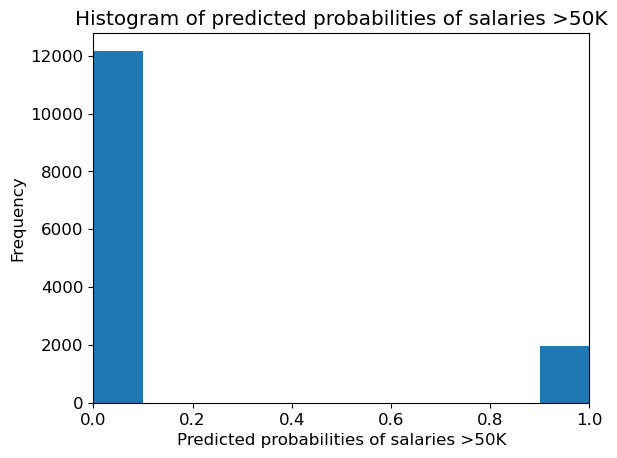

In [52]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# ROC - AUC for test

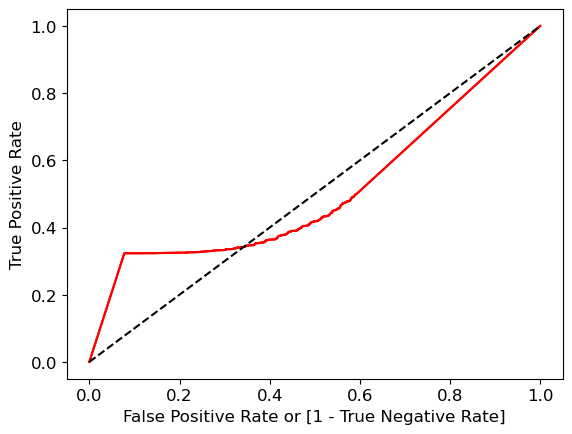

auc accuracy: 0.5061642012866118


In [58]:

# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test, y_pred1)
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test, y_pred1)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)